# Практическое задание

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

### Задание 4
Рассчитайте 99% доверительный интервал для следующего примера:

x =10

sd=5

n=100

In [122]:
x = 10
sd = 5
n1 = 100
z = 2.576
se = sd / np.sqrt(n1)
print(x - se * z, x + se * z, sep='\n\n')

8.712

11.288


### Задание 7

Использование доверительных интервалов зачастую рассматривают как альтернативный способ проверки гипотез. В нашем случае, если значение 20 (предполагаемое среднее значение в генеральной совокупности) не будет принадлежать 95% доверительному интервалу, рассчитанному по выборочным данным, то у нас будет достаточно оснований отклонить нулевую гипотезу.

Проверьте согласуются ли результаты двух этих подходов: рассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.  Параметры: $$n=64$$ $$sd=4$$ 
$$X = 18.5$$

In [123]:
x = 18.5
sd = 4
n = 64
z = 1.96
se = sd / np.sqrt(n)
print(x - se * z, x + se * z, sep='\n\n')

17.52

19.48


### Задание 10

В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p-уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

In [124]:
mu = 115
x = 118
n = 144
sd = 9
se = sd / np.sqrt(n)
z = (x - mu) / se
z

4.0

# Мини-проект

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

### Задание 1

Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

Есть ли в данных пропущенные значения?

In [125]:
public_key = 'https://disk.yandex.ru/d/h9u6tWco1EFfaA'

In [126]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [127]:
bike_london = pd.read_csv(download_url, parse_dates=['timestamp'])
bike_london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [128]:
bike_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


### Задание 2

Для начала попробуем посмотреть на число поездок по датам и времени. Постройте график, где:

по оси x – дата (timestamp)

по оси y – число поездок (cnt)

<Axes: xlabel='timestamp', ylabel='cnt'>

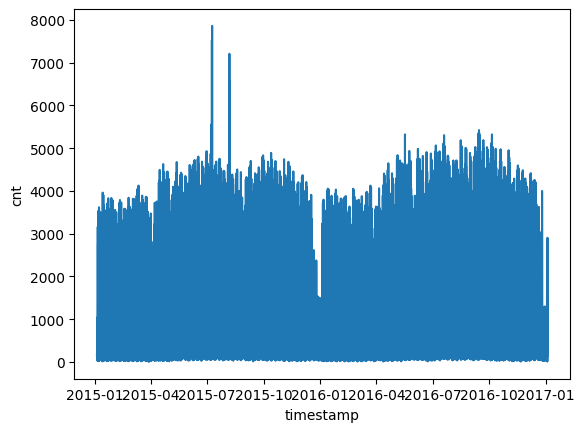

In [129]:
sns.lineplot(data=bike_london, x='timestamp', y='cnt')

### Задание 3

Отлично! Предположим, что данные действительно нужно немного преобразовать. В этом нам поможет resample, с которым вы могли столкнуться в дополнительных темах pandas. Этот метод позволяет преобразовать данные и применить к какому-либо столбцу другой метод (напр. sum). Так можно рассчитать показатели, например, за весь день или месяц, имея данные с точностью до минут. Например, посчитать сумму показателя по дням, имея данные по часам, можно следующим образом:

data.resample(rule='D').column_name.sum() #способ 1

data.resample(rule='D').agg({'column_name':'sum'}) #способ 2, эквивалентный предыдущему


Агрегируйте число поездок по дням и визуализируйте результат. Что вы можете сказать о полученном графике?

In [130]:
tstmp_index = bike_london.sort_values('timestamp').set_index('timestamp').resample(rule='D')['cnt'].sum()

In [131]:
tstmp_index

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

<Axes: xlabel='timestamp', ylabel='cnt'>

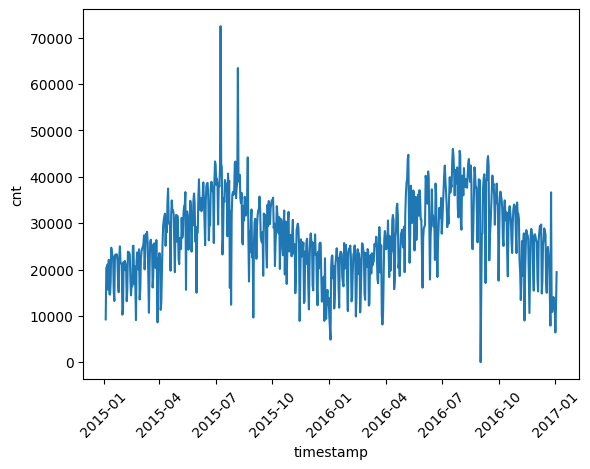

In [132]:
plt.xticks(rotation=45)
sns.lineplot(tstmp_index)

### Задание 4

Итак, вы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в те дни - и насколько эти изменения для нас неожиданны 🤔. Для этого мы попробуем построить доверительный интервал вокруг данных - всё, что выпадает за его пределы, будет считаться аномалией, и на отдельные из них мы потом и посмотрим.

Однако не всё так просто. Мы сейчас работаем с временным рядом - последовательностью значений, меняющейся во времени. Мы не можем просто так посчитать доверительный интервал для всего: так мы можем упустить важные характеристики данных! Например, сезонные колебания. 

Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее. Для этого разделим дальнейшие действия на несколько этапов:

сначала посчитаем скользящее среднее, чтобы сгладить ряд

далее – разницу между наблюдаемыми и сглаженными значениями

определим верхние и нижние границы 99% доверительного интервала 

найдем причины аномалий!

На данном шаге возьмите агрегированные данные по дням с предыдущего шага и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.

In [140]:
tstmp_index['rolling_mean'] = tstmp_index['cnt'].rolling(3).mean()

In [142]:
tstmp_index.query('timestamp == "2015-07-09"')

,timestamp,cnt,rolling_mean
186,2015-07-09,72504,50705.0


In [143]:
tstmp_index

,timestamp,cnt,rolling_mean
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


### Задание 5

Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения. Например:

c = a - b

std = np.std(c)


В качестве ответа введите полученное стандартное отклонение, округленное до 2 знаков после точки.

In [145]:
std = np.std(tstmp_index['cnt'] - tstmp_index['rolling_mean'])
std.round(2)

4558.59

### Задание 6

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std

lower_bound – нижняя граница; вычитаем 2.576∗std

Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

Note: в качестве std нужно брать стандартное отклонение без округления.

Note 2: вам может понадобиться убрать даты из индекса - иногда из-за этого колонки могут не присваиваться в датафрейм. Вам пригодится .reset_index().

In [146]:
tstmp_index

,timestamp,cnt,rolling_mean
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


In [151]:
tstmp_index['upper_bound'] = tstmp_index['rolling_mean'] + 2.576 * std
tstmp_index['lower_bound'] = tstmp_index['rolling_mean'] - 2.576 * std
tstmp_index.iloc[-1, -2].round(2)

24302.92

### Задание 7

И наконец – изучим аномально высокие значения! Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [156]:
tstmp_index

,timestamp,cnt,rolling_mean,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,30835.585854,7349.747479
...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,21632.252521,-1853.585854


In [160]:
tstmp_index[(tstmp_index['cnt'] > tstmp_index['upper_bound']) == True].sort_values('cnt', ascending=False)

,timestamp,cnt,rolling_mean,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812


### Задание 8

Подумайте, в чем может быть причина столь высокого числа аренд в этот день. Для этого можете исследовать уже имеющиеся переменные в датасете, проверить наличие ошибок в данных (повторяющихся строк), а также использовать поиск Google. 

В качестве ответа выберите наиболее вероятную причину столь резкого скачка:

### Задание 9

Проделайте аналогичную операцию для дней, когда число аренд оказалось ниже ожидаемого. В чем может быть причина падения числа аренд 2016-09-02?

In [162]:
tstmp_index[(tstmp_index['cnt'] < tstmp_index['lower_bound']) == True].sort_values('cnt')

,timestamp,cnt,rolling_mean,upper_bound,lower_bound
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479
